In [1]:
#importing all the required libraries
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
%matplotlib inline 

In [2]:
#importing the dataset called datasetHDP
datasetHDP = pd.read_csv("C:\\Users\\dpras\\Downloads\\archive\\heart_statlog_cleveland_hungary_final.csv")
x = datasetHDP.iloc[:,0:13].values
y = datasetHDP.iloc[:, -1].values

In [3]:
#spliting the datasetHDP into "Training set" and "Test set"
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2, random_state=0)

In [4]:
#feature scaling to get the values into a particular range
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
x_train=sc.fit_transform(x_train)
x_test=sc.transform(x_test)
print(x)
print(y)


[[40.   1.   2.  ...  0.   1.   0. ]
 [49.   0.   3.  ...  1.   2.   1. ]
 [37.   1.   2.  ...  0.   1.   0. ]
 ...
 [57.   1.   4.  ...  1.2  2.   1. ]
 [57.   0.   2.  ...  0.   2.   1. ]
 [38.   1.   3.  ...  0.   1.   0. ]]
[0 1 0 ... 1 1 0]


In [5]:
#applying pca
from sklearn.decomposition import PCA
pca = PCA(n_components= 2) #no of principal components that are required
x_train = pca.fit_transform(x_train)
x_test = pca.transform(x_test)
explained_variance= pca.explained_variance_ratio_
explained_variance

array([0.27618653, 0.13037371])

In [6]:
#implementing the classifier
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier(n_estimators = 10,criterion='entropy', random_state=0)
classifier.fit(x_train,y_train)

RandomForestClassifier(criterion='entropy', n_estimators=10, random_state=0)

In [7]:
#prediction
y_pred = classifier.predict(x_test)

In [8]:
#confusion matrix for accuracy 
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_test,y_pred)
cm

array([[102,   7],
       [  8, 121]], dtype=int64)

<ipython-input-9-5130994ed391>:6: UserWarning: The following kwargs were not used by contour: 'aplha'
  plt.contourf(x1,x2,classifier.predict(np.array([x1.ravel(),x2.ravel()]).T).reshape(x1.shape),
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


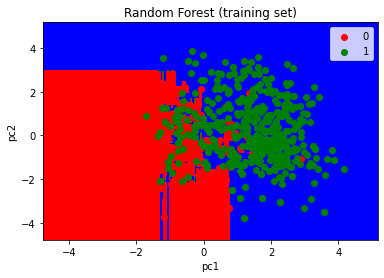

In [9]:
#visualising the training set results
from matplotlib.colors import ListedColormap
x_set,y_set=x_train,y_train
x1,x2 = np.meshgrid(np.arange(start=x_set[:,0].min()-1,stop=x_set[:,0].max()+1,step=0.01),
                    np.arange(start=x_set[:,0].min()-1,stop=x_set[:,0].max()+1,step=0.01))
plt.contourf(x1,x2,classifier.predict(np.array([x1.ravel(),x2.ravel()]).T).reshape(x1.shape),
             aplha=0.75,cmap=ListedColormap(("red","green","blue")))
plt.xlim(x1.min(),x1.max())
plt.ylim(x2.min(),x2.max())
for i,j in enumerate(np.unique(y_set)):
    plt.scatter(x_set[y_set==j,0],x_set[y_set==j,1],
               c=ListedColormap(("red","green","blue"))(i),label=j)
plt.title("Random Forest (training set)")
plt.xlabel('pc1')
plt.ylabel('pc2')
plt.legend()
plt.show()

<ipython-input-10-ba3c5b6576cc>:6: UserWarning: The following kwargs were not used by contour: 'aplha'
  plt.contourf(x1,x2,classifier.predict(np.array([x1.ravel(),x2.ravel()]).T).reshape(x1.shape),
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


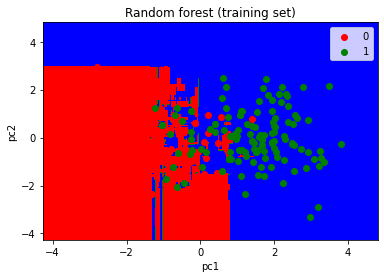

In [10]:
#visualising the training set results
from matplotlib.colors import ListedColormap
x_set,y_set=x_test,y_test
x1,x2 = np.meshgrid(np.arange(start=x_set[:,0].min()-1,stop=x_set[:,0].max()+1,step=0.01),
                    np.arange(start=x_set[:,0].min()-1,stop=x_set[:,0].max()+1,step=0.01))
plt.contourf(x1,x2,classifier.predict(np.array([x1.ravel(),x2.ravel()]).T).reshape(x1.shape),
             aplha=0.75,cmap=ListedColormap(("red","green","blue")))
plt.xlim(x1.min(),x1.max())
plt.ylim(x2.min(),x2.max())
for i,j in enumerate(np.unique(y_set)):
    plt.scatter(x_set[y_set==j,0],x_set[y_set==j,1],
               c=ListedColormap(("red","green","blue"))(i),label=j)
plt.title("Random forest (training set)")
plt.xlabel('pc1')
plt.ylabel('pc2')
plt.legend()
plt.show()

In [11]:
print('Train accuracy {:.2f}%'.format(classifier.score(x_train,y_train)*100))

Train accuracy 99.58%


In [12]:
print('Test accuracy {:.2f}%'.format(classifier.score(x_test,y_test)*100))



Test accuracy 93.70%


In [13]:
from sklearn.metrics import classification_report 
from sklearn.ensemble import RandomForestClassifier

model6 = RandomForestClassifier(random_state=1)# get instance of model
model6.fit(x_train, y_train) # Train/Fit model 

y_pred6 = model6.predict(x_test) # get y predictions
print(classification_report(y_test, y_pred6)) # output accuracy

              precision    recall  f1-score   support

           0       0.94      0.90      0.92       109
           1       0.92      0.95      0.94       129

    accuracy                           0.93       238
   macro avg       0.93      0.93      0.93       238
weighted avg       0.93      0.93      0.93       238



In [14]:
from sklearn import metrics
cm = metrics.confusion_matrix(y_test, y_pred) 
print(cm)
accuracy = metrics.accuracy_score(y_test, y_pred) 
print("Accuracy score:",accuracy)
precision = metrics.precision_score(y_test, y_pred) 
print("Precision score:",precision)
recall = metrics.recall_score(y_test, y_pred) 
print("Recall score:",recall)

[[102   7]
 [  8 121]]
Accuracy score: 0.9369747899159664
Precision score: 0.9453125
Recall score: 0.937984496124031
